Boosting is slow learning procedure. In boosting, a tree is not allowed to grow fully. Rather, the depth is fixed to a small number. In some cases, a tree is build with only one branch and two nodes. But subsequent trees are built on top of it. Further, contributions from subsequent trees are also shrinked and added to previously built tree. Though an individual tree might preform badly for the classification, combination of many trees perform surprisingly well. For more details regarding the algorithm, readers can refer to [this excellent book](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Sixth%20Printing.pdf). 

In this post we will apply boosting to classify multiclass bearing fault. 

# Description of data

[Detailed discussion of how to prepare the data and its source can be found in this post.](https://github.com/biswajitsahoo1111/cbm_codes_open/blob/master/notebooks/SVM_wavelet_energy_multiclass_cwru_python.ipynb) Here we will only mention about different classes of the data. There are 10 classes and data for each class are taken at a load of 1hp. The classes are:

* C1  : Ball defect (0.007 inch)
* C2  : Ball defect (0.014 inch)
* C3  : Ball defect (0.021 inch)
* C4  : Inner race fault (0.007 inch)
* C5  : Inner race fault (0.014 inch)
* C6  : Inner race fault (0.021 inch)
* C7  : Normal
* C8  : Outer race fault (0.007 inch, data collected from 6 O'clock position)
* C9  : Outer race fault (0.014 inch, 6 O'clock)
* C10 : Outer race fault (0.021 inch, 6 O'clock)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

### How to get data?

Readers can download the `.csv` file used in this notebook from [here](https://github.com/biswajitsahoo1111/cbm_codes_open/blob/master/notebooks/data/feature_wav_energy8_48k_2048_load_1.csv). Another convenient way is to [download the whole repository](https://codeload.github.com/biswajitsahoo1111/cbm_codes_open/legacy.zip/master) and run the downloaded notebooks.

In [2]:
data_wav_energy = pd.read_csv("./data/feature_wav_energy8_48k_2048_load_1.csv")

In [3]:
train_data, test_data = train_test_split(data_wav_energy, test_size = 750, stratify = data_wav_energy['fault'],
                                         random_state = 132)

In [4]:
boosting_clf = GradientBoostingClassifier(n_estimators= 200, max_depth= 2, random_state = 321)

In [5]:
boosting_clf.fit(train_data.iloc[:,:-1], train_data['fault'])

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=321, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [6]:
train_predictions = boosting_clf.predict(train_data.iloc[:,:-1])
test_predictions = boosting_clf.predict(test_data.iloc[:,:-1])

In [7]:
overall_train_accuracy = accuracy_score(train_data['fault'], train_predictions)
print("Overall train accuracy: ", overall_train_accuracy)

Overall train accuracy:  1.0


In [8]:
train_confu_matrix = confusion_matrix(train_data['fault'], train_predictions)
test_confu_matrix = confusion_matrix(test_data['fault'], test_predictions)

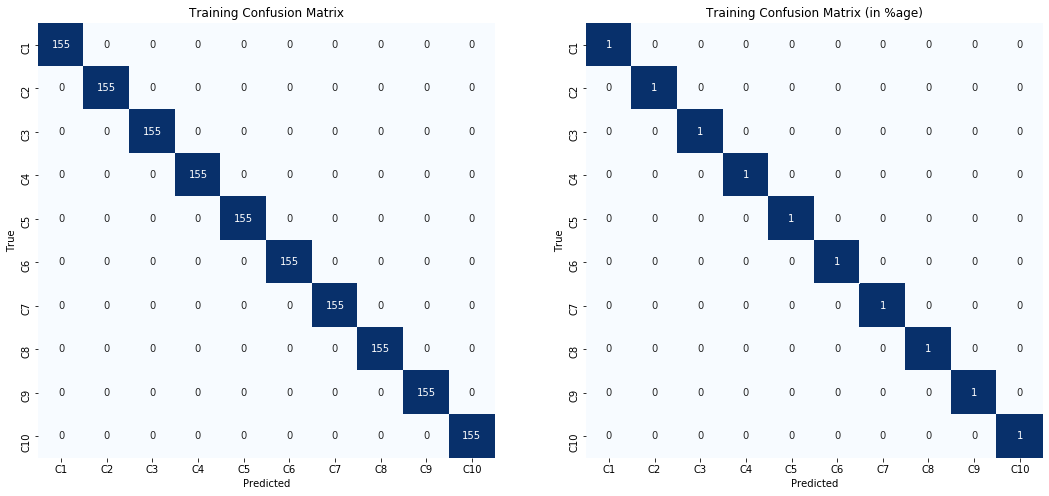

In [9]:
fault_type = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']
plt.figure(1,figsize=(18,8))
plt.subplot(121)
sns.heatmap(train_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(train_confu_matrix/155, annot= True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

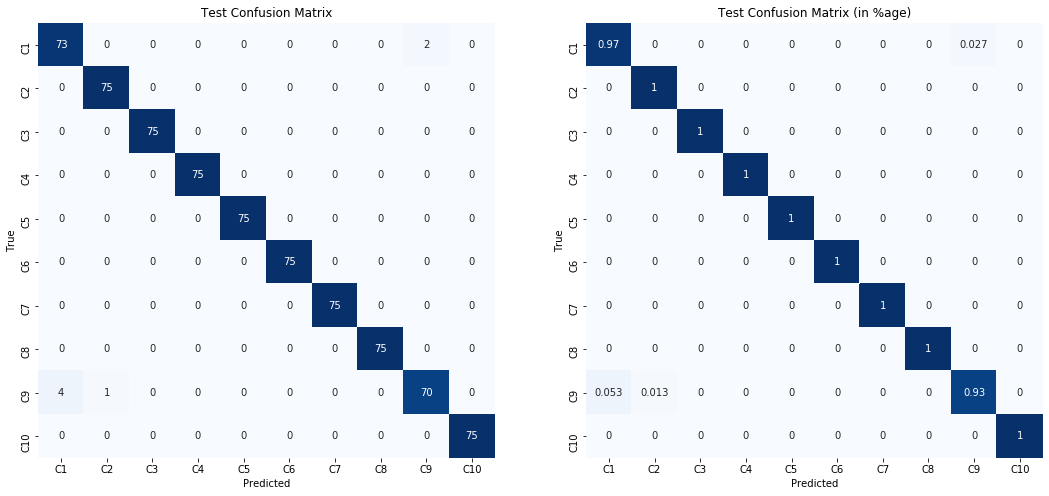

In [10]:
plt.figure(2,figsize=(18,8))
plt.subplot(121)
sns.heatmap(test_confu_matrix, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(test_confu_matrix/75, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [11]:
overall_test_accuracy = accuracy_score(test_data['fault'], test_predictions)
print("Overall test accuracy: ", overall_test_accuracy)

Overall test accuracy:  0.9906666666666667


[To see results of other techniques applied to public condition monitoring datasets, visit this page](https://biswajitsahoo1111.github.io/cbm_codes_open/).